In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('EventsTest.csv', sep=';')
df.head()

,eventtimestamp,dataid,alertFlags,batteryLevel,signalStrength,temperature,macaddress,timestampgateway1,gatewayid1,messagetimestamp,...,id,macaddress2,asssetid,arrivalTime,DepartureTime,ToLat,ToLon,ToSite,FromLat,FromLon
0,20171111Z,71690290-c6bf-11e7-9b04-733c46a7fa80,7,8,-77,34.0,A0:E6:F8:48:62:6A,2017-11-11 09:05:19+0000,GW001085,2017-11-11 08:55:17+0000,...,855752,A0:E6:F8:48:62:6A,113,27-3-2018 11:36,27-3-2018 11:36,"-633,719,342,811,063","106,681,715,844,319",626,"-633,719,342,811,063","106,681,715,844,319"
1,20171111Z,3c98a040-c6c2-11e7-9b04-733c46a7fa80,7,8,-77,33.5,A0:E6:F8:48:62:6A,2017-11-11 09:25:19+0000,GW001085,2017-11-11 09:25:17+0000,...,855752,A0:E6:F8:48:62:6A,113,27-3-2018 11:36,27-3-2018 11:36,"-633,719,342,811,063","106,681,715,844,319",626,"-633,719,342,811,063","106,681,715,844,319"
2,20180224Z,03a886b0-197e-11e8-b1b5-0fb4661abe0f,5,6,-80,33.5,CC:78:AB:15:3F:BE,2018-02-24 16:16:03+0000,GW001154,2018-02-24 16:00:44+0000,...,670634,CC:78:AB:15:3F:BE,11893,10-8-2017 12:15,10-8-2017 11:07,"519,985,246","42,281,868",672,"52,238,390,688,236","61,737,412,753,937"
3,20180224Z,03a886b0-197e-11e8-b1b5-0fb4661abe0f,5,6,-80,33.5,CC:78:AB:15:3F:BE,2018-02-24 16:16:03+0000,GW001154,2018-02-24 16:00:44+0000,...,670702,CC:78:AB:15:3F:BE,11893,10-8-2017 12:20,10-8-2017 12:15,"52,238,390,688,236","61,737,412,753,937",605,"519,985,246","42,281,868"
4,20180224Z,03a886b0-197e-11e8-b1b5-0fb4661abe0f,5,6,-80,33.5,CC:78:AB:15:3F:BE,2018-02-24 16:16:03+0000,GW001154,2018-02-24 16:00:44+0000,...,851270,CC:78:AB:15:3F:BE,11893,1-3-2018 10:03,1-3-2018 10:00,"51,581,011","5,310,742",758,"52,238,390,688,236","61,737,412,753,937"


In [3]:
df.columns

Index(['eventtimestamp', 'dataid', 'alertFlags', 'batteryLevel',
       'signalStrength', 'temperature', 'macaddress', 'timestampgateway1',
       'gatewayid1', 'messagetimestamp', 'assetid', 'id', 'macaddress2',
       'asssetid', 'arrivalTime', 'DepartureTime', 'ToLat', 'ToLon', 'ToSite',
       'FromLat', 'FromLon'],
      dtype='object')

In [4]:
new_df = df[['alertFlags', 'batteryLevel','signalStrength', 'temperature']]
new_df.head()

,alertFlags,batteryLevel,signalStrength,temperature
0,7,8,-77,34.0
1,7,8,-77,33.5
2,5,6,-80,33.5
3,5,6,-80,33.5
4,5,6,-80,33.5


<AxesSubplot:xlabel='alertFlags', ylabel='temperature'>

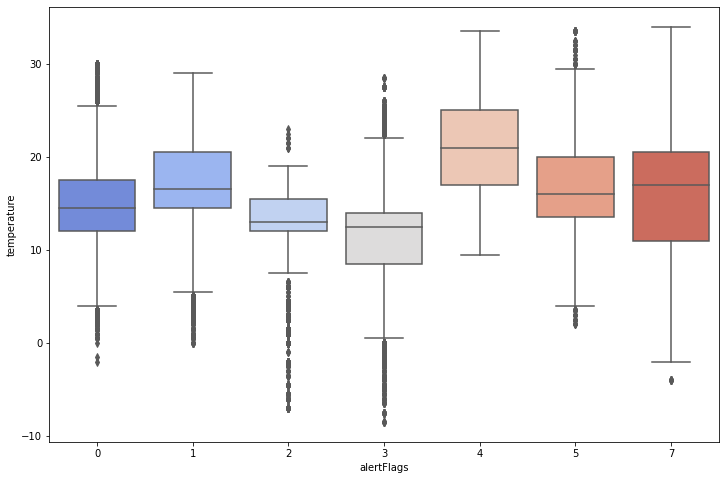

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(data=new_df, x='alertFlags', y='temperature', palette='coolwarm')

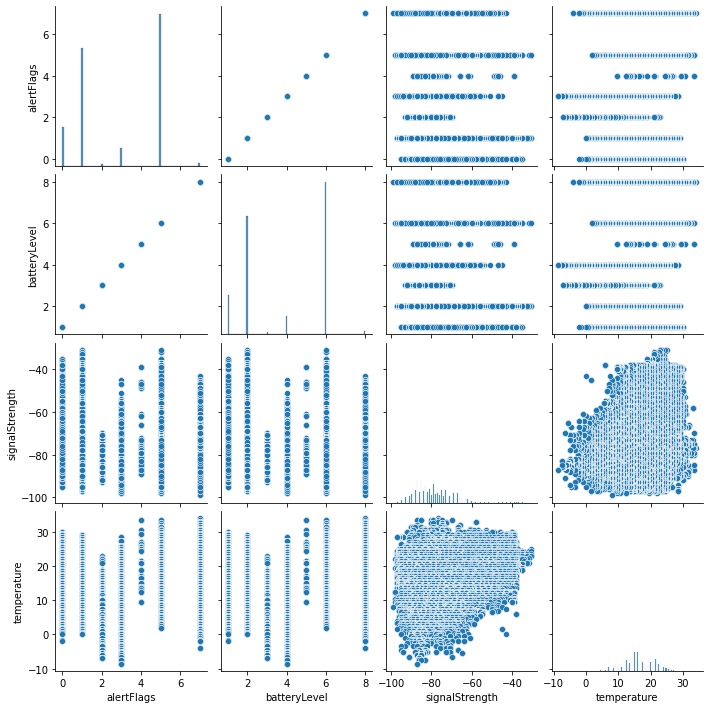

In [6]:
sns.pairplot(new_df)

In [7]:
#Scalar 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(new_df.drop('alertFlags', axis=1))

StandardScaler()

In [11]:
scaled_features1 = scaler.fit_transform(new_df.drop('alertFlags', axis=1))

In [12]:
scalar_df = pd.DataFrame(scaled_features1, columns=new_df.columns[:-1])

In [13]:
scalar_df

,alertFlags,batteryLevel,signalStrength
0,1.953013,0.114618,3.840550
1,1.953013,0.114618,3.732307
2,1.004286,-0.170366,3.732307
3,1.004286,-0.170366,3.732307
4,1.004286,-0.170366,3.732307
...,...,...,...
987771,0.055559,-0.835328,-5.360078
987772,0.055559,-0.835328,-5.360078
987773,0.055559,-0.835328,-5.360078
987774,0.055559,-0.835328,-5.360078


In [14]:
#Build model

In [15]:
scalar_df.drop('alertFlags', axis=1, inplace=True)

In [16]:
scalar_df

,batteryLevel,signalStrength
0,0.114618,3.840550
1,0.114618,3.732307
2,-0.170366,3.732307
3,-0.170366,3.732307
4,-0.170366,3.732307
...,...,...
987771,-0.835328,-5.360078
987772,-0.835328,-5.360078
987773,-0.835328,-5.360078
987774,-0.835328,-5.360078


In [17]:
scalar_df

,batteryLevel,signalStrength
0,0.114618,3.840550
1,0.114618,3.732307
2,-0.170366,3.732307
3,-0.170366,3.732307
4,-0.170366,3.732307
...,...,...
987771,-0.835328,-5.360078
987772,-0.835328,-5.360078
987773,-0.835328,-5.360078
987774,-0.835328,-5.360078


In [18]:
#TRain test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = scalar_df

In [21]:
y= new_df['alertFlags']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [23]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [24]:
#Build model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
#predictions

In [29]:
knn_predictions = knn_model.predict(X_test)

In [30]:
knn_predictions

array([0, 5, 5, ..., 5, 5, 5], dtype=int64)

In [31]:
np.savetxt('Predictions-Events-KNNalgorithm.csv', knn_predictions, '%s')

In [32]:
#Evaluation 

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.30      0.36      0.33     34717
           1       0.60      0.56      0.58    104966
           2       0.21      0.18      0.19      1915
           3       0.44      0.39      0.41     16296
           4       0.73      0.18      0.30       119
           5       0.68      0.69      0.69    135652
           7       0.22      0.23      0.22      2668

    accuracy                           0.58    296333
   macro avg       0.45      0.37      0.39    296333
weighted avg       0.59      0.58      0.59    296333



In [35]:
print(confusion_matrix(y_test, knn_predictions))

[[12443  9109   614  2205     1  9838   507]
 [13780 58910   352  2255     1 28889   779]
 [  486   555   346    93     0   398    37]
 [ 3040  2911    63  6379     0  3751   152]
 [   50    18     0     1    22    26     2]
 [10992 26129   287  3388     1 94159   696]
 [  442   579    24   197     5   809   612]]


In [36]:
matrix = confusion_matrix(y_test, knn_predictions)

<AxesSubplot:>

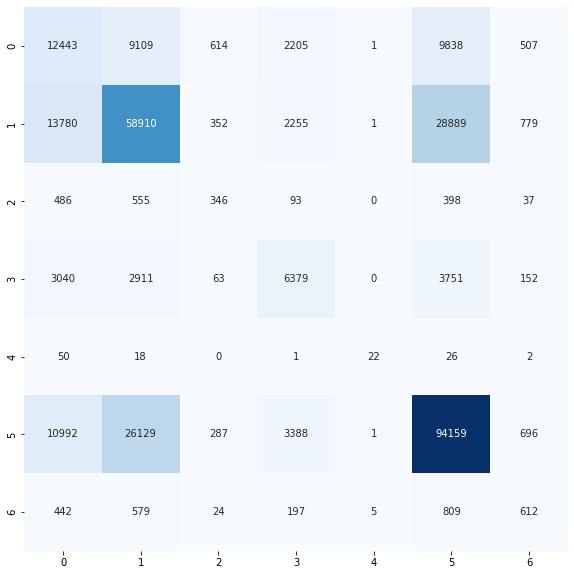

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(matrix, square=True, annot=True, cmap='Blues', cbar=False, fmt='d')

In [38]:
error_rate = []

for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    error_rate.append(np.mean(y_test!=knn_predictions))

Text(0.5, 1.0, 'Error rate vs. K-value')

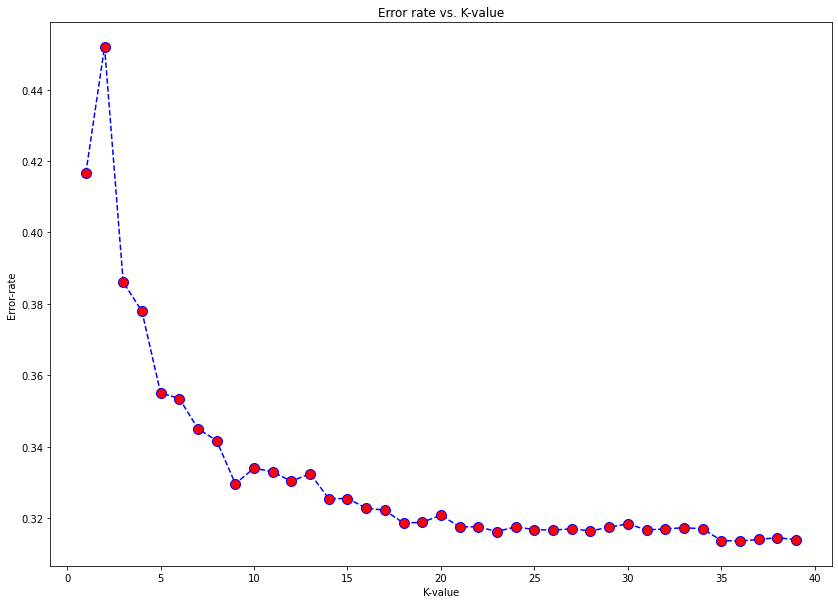

In [43]:
plt.figure(figsize=(14,10))
plt.plot(range(1,40), error_rate, color='blue', marker='o', markerfacecolor='red', markersize=10, linestyle='dashed')
plt.xlabel('K-value')
plt.ylabel('Error-rate')
plt.title('Error rate vs. K-value')

In [44]:
knn_model2 = KNeighborsClassifier(n_neighbors=35)

In [45]:
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [46]:
knn_model2

KNeighborsClassifier(n_neighbors=35)

In [47]:
#Predictions

In [48]:
knn_predictions2 = knn_model2.predict(X_test)

In [49]:
knn_predictions2

array([1, 1, 5, ..., 5, 5, 1], dtype=int64)

In [50]:
np.savetxt('Predictions-Events-KNNalgorithms-2.csv', knn_predictions2, '%s')

In [51]:
#Evaluation 

In [52]:
print(classification_report(y_test, knn_predictions2))

              precision    recall  f1-score   support

           0       0.58      0.35      0.44     34717
           1       0.67      0.69      0.68    104966
           2       0.48      0.16      0.24      1915
           3       0.68      0.43      0.53     16296
           4       0.41      0.29      0.34       119
           5       0.71      0.82      0.76    135652
           7       0.66      0.15      0.25      2668

    accuracy                           0.69    296333
   macro avg       0.60      0.41      0.46    296333
weighted avg       0.68      0.69      0.67    296333



In [54]:
print(confusion_matrix(y_test, knn_predictions2))

[[ 12187   9382    133   1160     29  11786     40]
 [  4135  72333     57   1184     13  27195     49]
 [   365    585    312     73      0    580      0]
 [  1456   3001     48   6979      0   4786     26]
 [    23     25      0      2     35     29      5]
 [  2529  21164     72    654      9 111141     83]
 [   456    707     23    213      0    867    402]]


In [55]:
matrix2 = confusion_matrix(y_test, knn_predictions2)

<AxesSubplot:>

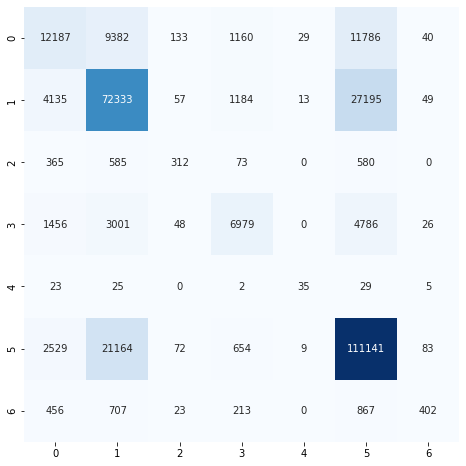

In [57]:
plt.figure(figsize=(14,8))
sns.heatmap(matrix2, square=True, annot=True, cmap='Blues', cbar=False, fmt='d')